In [1]:
# Import necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [17]:
# Step 1: Load the Iris dataset
# Load the Iris dataset using load_iris() and store it in a variable named `data`
# Hint: data = load_iris()
# TODO: Load the dataset
iris_ = load_iris(as_frame=True).frame
iris_

# Step 2: Define Features and Labels
# Extract the features (X) and labels (y) from `data`
# Set y to be a binary classification where Setosa (label 0) is 1, and all other labels are 0
# Hint: X = data.data; y = (data.target == 0).astype(int)
# TODO: Extract features and labels, transform y for binary classification
features = iris_.iloc[:,:-1]
labels = iris_.target
labels_for_Setosa = (labels==0).astype(int) #have to do tjis 

# Step 3: Split the Dataset
# Split X and y into training and test sets with a test_size of 0.3 and random_state of 0
# Hint: Use train_test_split()
# TODO: Split the dataset into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels_for_Setosa, test_size=0.3)

# Step 4: Initialize the Perceptron Model
# Initialize the Perceptron model with the following parameters:
# - max_iter=1000
# - tol=1e-3
# - eta0=0.1
# - random_state=0
# TODO: Initialize the model
Percep_model = Perceptron(max_iter=1000, tol=0.001, eta0=0.1, random_state=0)


# Step 5: Train the Model
# Train the Perceptron model on the training set (X_train, y_train)
# Hint: Use the model's fit() method
# TODO: Train the model
Percep_model.fit(features_train, labels_train) 

# Step 6: Make Predictions
# Use the trained model to make predictions on the test set (X_test)
# Hint: Use the model's predict() method and store the result in y_pred
# TODO: Make predictions on the test set
label_predict = Percep_model.predict(features_test)

# Step 7: Evaluate the Model
# Calculate the accuracy of the model using accuracy_score() on y_test and y_pred: use accuracy_model
# Calculate the confusion matrix for y_test and y_pred: use confusion_matrix
# Print both the accuracy and the confusion matrix
# TODO: Calculate and print accuracy and confusion matrix
conf_mat = confusion_matrix(labels_test, label_predict)
accuracy = accuracy_score(labels_test, label_predict)

# Step 8: Output the Learned Weights and Bias
# Print the weights and bias learned by the model using model.coef_ and model.intercept_
print("\nLearned Weights:", Percep_model.coef_)
print("Learned Bias:", Percep_model.intercept_)



Learned Weights: [[ 0.11  0.46 -0.86 -0.3 ]]
Learned Bias: [0.1]


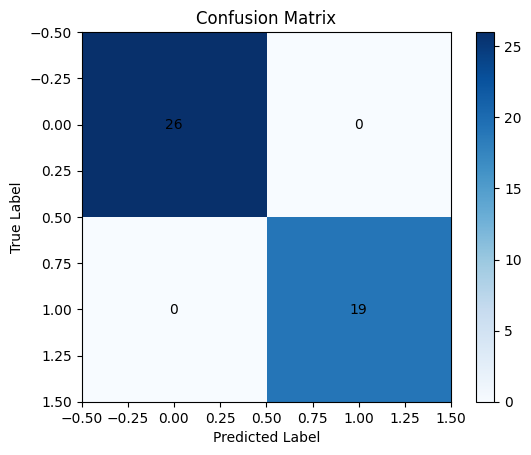

In [21]:
#from chatgpt
import matplotlib.pyplot as plt
# Plot confusion matrix
plt.imshow(conf_mat, cmap='Blues')
plt.colorbar()

# Overlay the numbers on the confusion matrix
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='black')

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()